# Imports and plot properties

In [1]:
"""
Created on Thu Feb  6 15:24:06 2020

@author: Shiva
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
import pandas as pd
from pandas import read_excel
from matplotlib.font_manager import FontProperties
from scipy.ndimage.interpolation import shift
import os, sys
import glob
import timeit
from scipy import stats
import statsmodels.stats.api as sms
from matplotlib.collections import LineCollection
from tempfile import TemporaryFile
import matplotlib.gridspec as gridspec
import seaborn as sns
from statannot import add_stat_annotation
### import Rat_lever.py module
current_path = os.path.dirname(os.path.realpath('__file__'))
module_path = os.path.abspath(os.path.join(current_path, '..'))
sys.path.append(module_path)
from Rat_Lever import *

import itertools
import pickle
from pathlib import Path
import yaml
from ruamel.yaml import YAML
from os.path import dirname as up
flatten = itertools.chain.from_iterable

#############################   Plot properties   ########################################################


font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')
font.set_size('30')
font.set_weight('bold')

font_label = FontProperties()
font_label.set_family('serif')
font_label.set_name('Times New Roman')
font_label.set_style('italic')
font_label.set_size('25')
font_label.set_weight('bold')

pre_direct = '/home/shiva/Desktop/Rat_Lever_Analysis' # ubuntu director

# Create metadata df

In [6]:
folder_list =["Square_2-5_mW_partial-MT_Nf_375", "Square_5_mW_all-RT_Nf_500","Beta_20_mW_all-RT_Nf_375",
              "Beta_15_mW_all-MT_Nf_500", "Beta_10_mW_all-RT_Nf_375","Square_5_mW_partial-MT_Nf_500"]            
exp_par_list = ['Laser_ArchT','Laser_ArchT', 'Laser_ArchT', 'Laser_ArchT', 'Laser_ChR2', 'Laser_ChR2']  
frame_height_list = np.array([400, 400, 400, 400, 400,300])
experiment_dict = {'folder':folder_list, 'exp_par':exp_par_list, 'frame_height':frame_height_list}

metadata = build_metadeta_all_folders(experiment_dict)
metadata.to_csv(os.join.path(pre_direct,'opto_exp_all_protocols_and_animals.csv'),header = True,index=False)

to discard bc no solid detection above pad 0
# second order jitter : 0
discarded:  1
n trials =  42
to discard bc no solid detection above pad 1
# second order jitter : 0
discarded:  1
n trials =  42
to discard bc no solid detection above pad 2
# second order jitter : 0
discarded:  5
n trials =  38
to discard bc no solid detection above pad 0
# second order jitter : 0
discarded:  0
n trials =  35
to discard bc no solid detection above pad 0
# second order jitter : 0
discarded:  0
n trials =  43
to discard bc no solid detection above pad 0
# second order jitter : 0
discarded:  0
n trials =  43
to discard bc no solid detection above pad 0
# second order jitter : 0
discarded:  0
n trials =  43
to discard bc no solid detection above pad 0
# second order jitter : 0
discarded:  0
n trials =  43
to discard bc no solid detection above pad 0
# second order jitter : 0
discarded:  0
n trials =  43
to discard bc no solid detection above pad 0
# second order jitter : 0
discarded:  0
n trials =  43


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

laser v.s. no laser: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.519e-01 U_stat=2.100e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

laser v.s. no laser: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.676e-01 U_stat=5.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

laser v.s. no laser: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.956e-03 U_stat=2.330e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p 

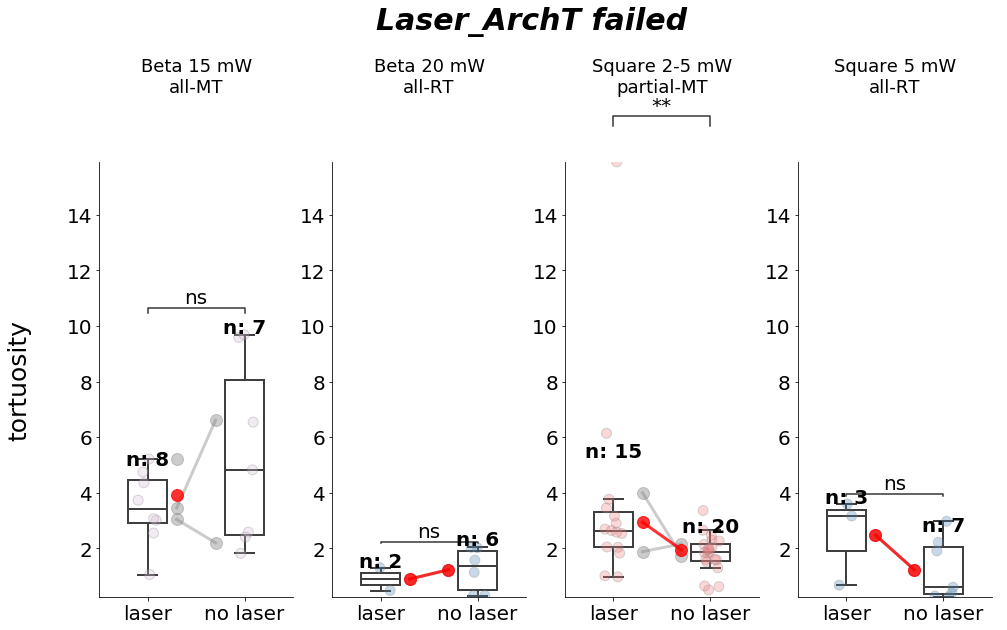

In [36]:
df = pd.read_csv( os.path.join( pre_direct, 'opto_exp_all_protocols_and_animals.csv'), delimiter=",")
df['folder'] = df['pulse'] + df['intensity'] + df['protocol']

column = 'folder'
y = 'tortuosity'
# y = 'RT(ms)'
# y = 'MT(ms)'
# y = 'v_max(cm/s)'
exp_par = 'Laser_ArchT'
# exp_par = 'Laser_ChR2'
# trial = 'successful'
trial = 'failed'

df_plot = df[(df['opto_par'] == exp_par) & (df['trial'] == trial)]

protocol_palete_dict = {'all-RT':['steelblue','lightskyblue'], 'all-MT':['indigo','thistle'],
                       'partial-MT':['lightcoral','peachpuff']}
protocol_color_dict = {'all-RT':'steelblue', 'all-MT':'thistle',
                       'partial-MT':'lightcoral'}
def sns_box_point_plot(df,y,column,exp_par,trial):
    n_subplots = len(np.unique(df['folder']))
    y_max = max(df[y]) ; y_min = min(df[y])
    fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(4*n_subplots, 8))
    folders = np.unique(df['folder'])
    for count in range(1,len(np.unique(df['folder']))+1):
        folder = folders[count-1]
        result = df[df['folder'] == folder]
        ax = axes[count-1] 
        ax = plt.subplot(100+n_subplots*10+count)
        set_ticks(ax)
        protocol = result['protocol'].values[0]
        trial = result['trial'].values[0]


        sns.stripplot(x="laser", y=y, order=["laser", "no laser"], data=result,jitter=True, edgecolor='grey',
                            linewidth=1,marker='o', size = 10,alpha=0.3 , color=protocol_color_dict[protocol])#color=(.25,.5,.75) )
        g = sns.boxplot(x="laser", y=y, order=["laser", "no laser"],linewidth=2,
                    data=result, fliersize = 0,dodge=False,width = 0.4, boxprops={'facecolor':'None'})
        add_stat_annotation(g, data=result,x="laser", y=y, order=["laser", "no laser"],
                    box_pairs=[("laser", "no laser")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2,fontsize = 20)

        medians = result.groupby(['laser'])[y].quantile(.9)
        nobs =  result.groupby(['laser']).apply(lambda x: 'n: {}'.format(len(x)))
        for tick, label in enumerate(ax.get_xticklabels()):
            ax_laser = label.get_text()
            x_offset = tick
            med_val = medians[ ax_laser]
            num = nobs[ax_laser]

            ax.text(tick, med_val + 0.1, num,
                        horizontalalignment='center', size=20, color='k', weight='semibold')
        rat_key = np.unique(result['rat_no'])
        grouped_ave_var =  group_and_av_animals(result,y)
        x = [0.3,0.7]
        for i in range(grouped_ave_var.shape[0]):
            plt.plot(x,grouped_ave_var[i],'-o',lw = 3, c= 'grey',alpha = 0.4,markersize = 12)
        plt.plot(x,np.average(grouped_ave_var,axis = 0),'-o',lw = 3, c= 'r',alpha = 0.8,markersize = 12)
        plt.ylim(y_min,y_max)
        # get legend information from the plot object
        # handles, labels = ax.get_legend_handles_labels()
        # specify just one legend
        # plt.legend(handles[0:2], labels[0:2], fontsize = 20)
        plt.ylabel('').set_fontproperties(font_label)
        plt.xlabel('').set_fontproperties(font_label)
        plt.title(result['pulse'].values[0]+' '+ result['intensity'].values[0]+' mW' +
                  '\n'+ result['protocol'].values[0],fontsize = 18,pad=70)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
#     y_title_pos = ax.get_position().get_points()+0.2
    fig.suptitle(exp_par+' ' + trial,y=1.15, fontproperties=font)
    fig.add_subplot(111, frameon=False)
    # hide tick and tick label of the big axis
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.ylabel(y,fontsize = 25,labelpad=45)
    if '/' in y : y = y.replace('/', '_')
    plt.savefig( os.path.join(pre_direct, 'Subplots', y + '_'+trial+'_Rat_'+folder+'_'+exp_par+
                         '.png'),bbox_inches='tight',orientation='landscape',dpi=200)
    
sns_box_point_plot(df_plot,y,column,exp_par,trial)

# Get all sessions 6OHDA mean trajectory

/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_-1_fps_250_Nf_375/Left/Plots  already exists!
Day_-1_fps_250_Nf_375
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
to discard - pad misdetection 6
to discard - low likelihoods  0
# second order jitter : 0
discarded:  6
n trials =  37
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
pad not off before reward
pad not off before reward
to discard - pad misdetection 2
to discard - low likelihoods  0
# second order jitter : 0
discarded:  2
n trials =  41
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
to discard - pad misdetection 7
to discard - low likelihoods  0
# second order jitter : 0
discarded:  7
n trials =  36
 succeeded

No handles with labels found to put in legend.


/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0_fps_250_Nf_375/Left/Plots  already exists!
Day_0_fps_250_Nf_375
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 1
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 3
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  22
to discard - pad misdetection 0
to discard - low likelihoods  0


No handles with labels found to put in legend.


# second order jitter : 2
discarded:  0
n trials =  43
 succeeded =  146 
 failed =  5 
 pad miss detections =  0
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_7_fps_250_Nf_375/Left/Plots  already exists!
Day_7_fps_250_Nf_375
to discard - pad misdetection 0
to discard - low likelihoods  1
# second order jitter : 0
discarded:  1
n trials =  42
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43


No handles with labels found to put in legend.


to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  30
 succeeded =  240 
 failed =  4 
 pad miss detections =  0
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_8_fps_250_Nf_375/Left/Plots  already exists!
Day_8_fps_250_Nf_375
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43


No handles with labels found to put in legend.


to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
 succeeded =  167 
 failed =  5 
 pad miss detections =  0
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_9_fps_250_Nf_375/Left/Plots  already exists!
Day_9_fps_250_Nf_375
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 2
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  1


No handles with labels found to put in legend.


# second order jitter : 0
discarded:  1
n trials =  42
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  40
 succeeded =  124 
 failed =  1 
 pad miss detections =  0
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_10_fps_250_Nf_375/Left/Plots  already exists!
Day_10_fps_250_Nf_375
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 4
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
to discard - pad misdetection 0
to discard - low likelihoods  0


No handles with labels found to put in legend.


# second order jitter : 1
discarded:  0
n trials =  28
 succeeded =  114 
 failed =  0 
 pad miss detections =  0
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_-1_fps_250_Nf_375/Left/Plots  already exists!
Day_-1_fps_250_Nf_375
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
to discard - pad misdetection 6
to discard - low likelihoods  0
# second order jitter : 0
discarded:  6
n trials =  37
to discard - pad misdetection 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
pad not off before reward
pad not off before reward
to discard - pad misdetection 2
to discard - low likelihoods  0
# second order jitter : 0
discarded:  2
n trials =  41
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
to discard - pa

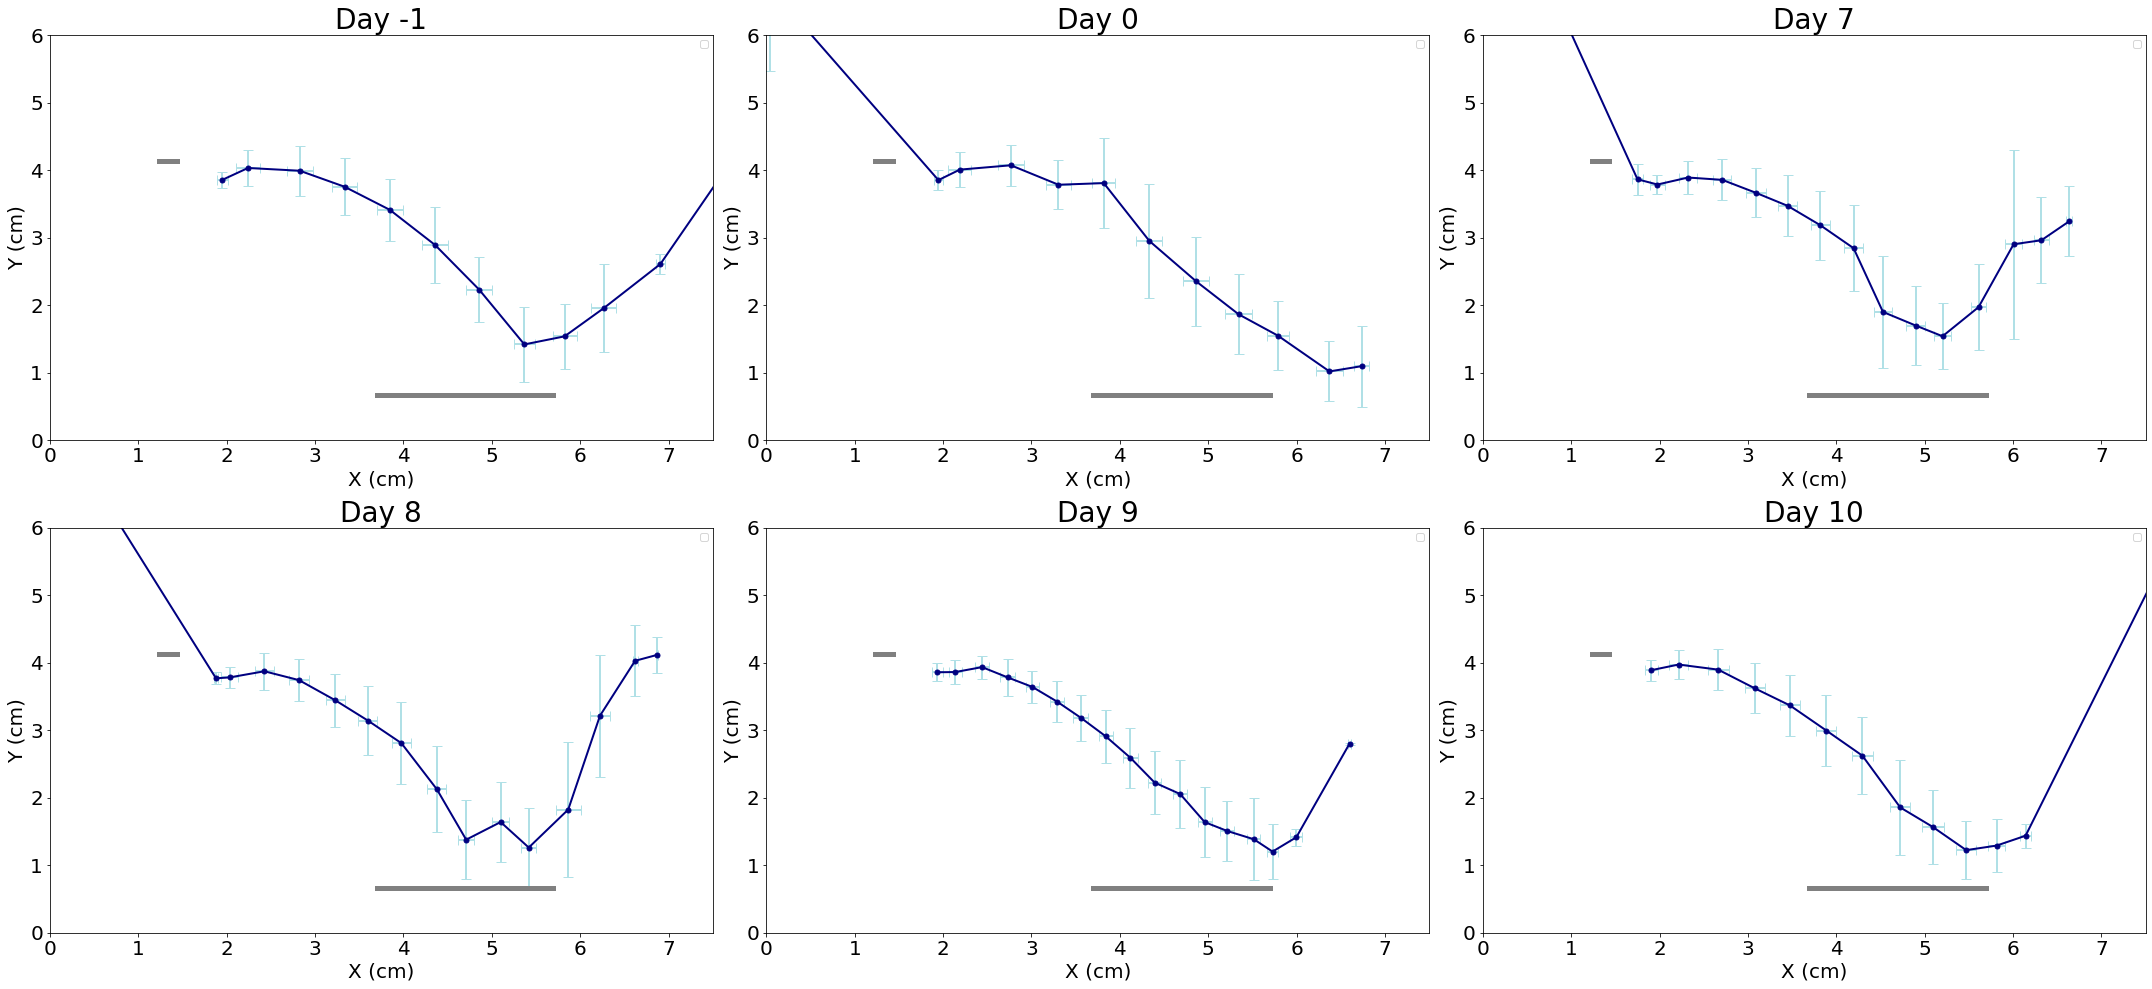

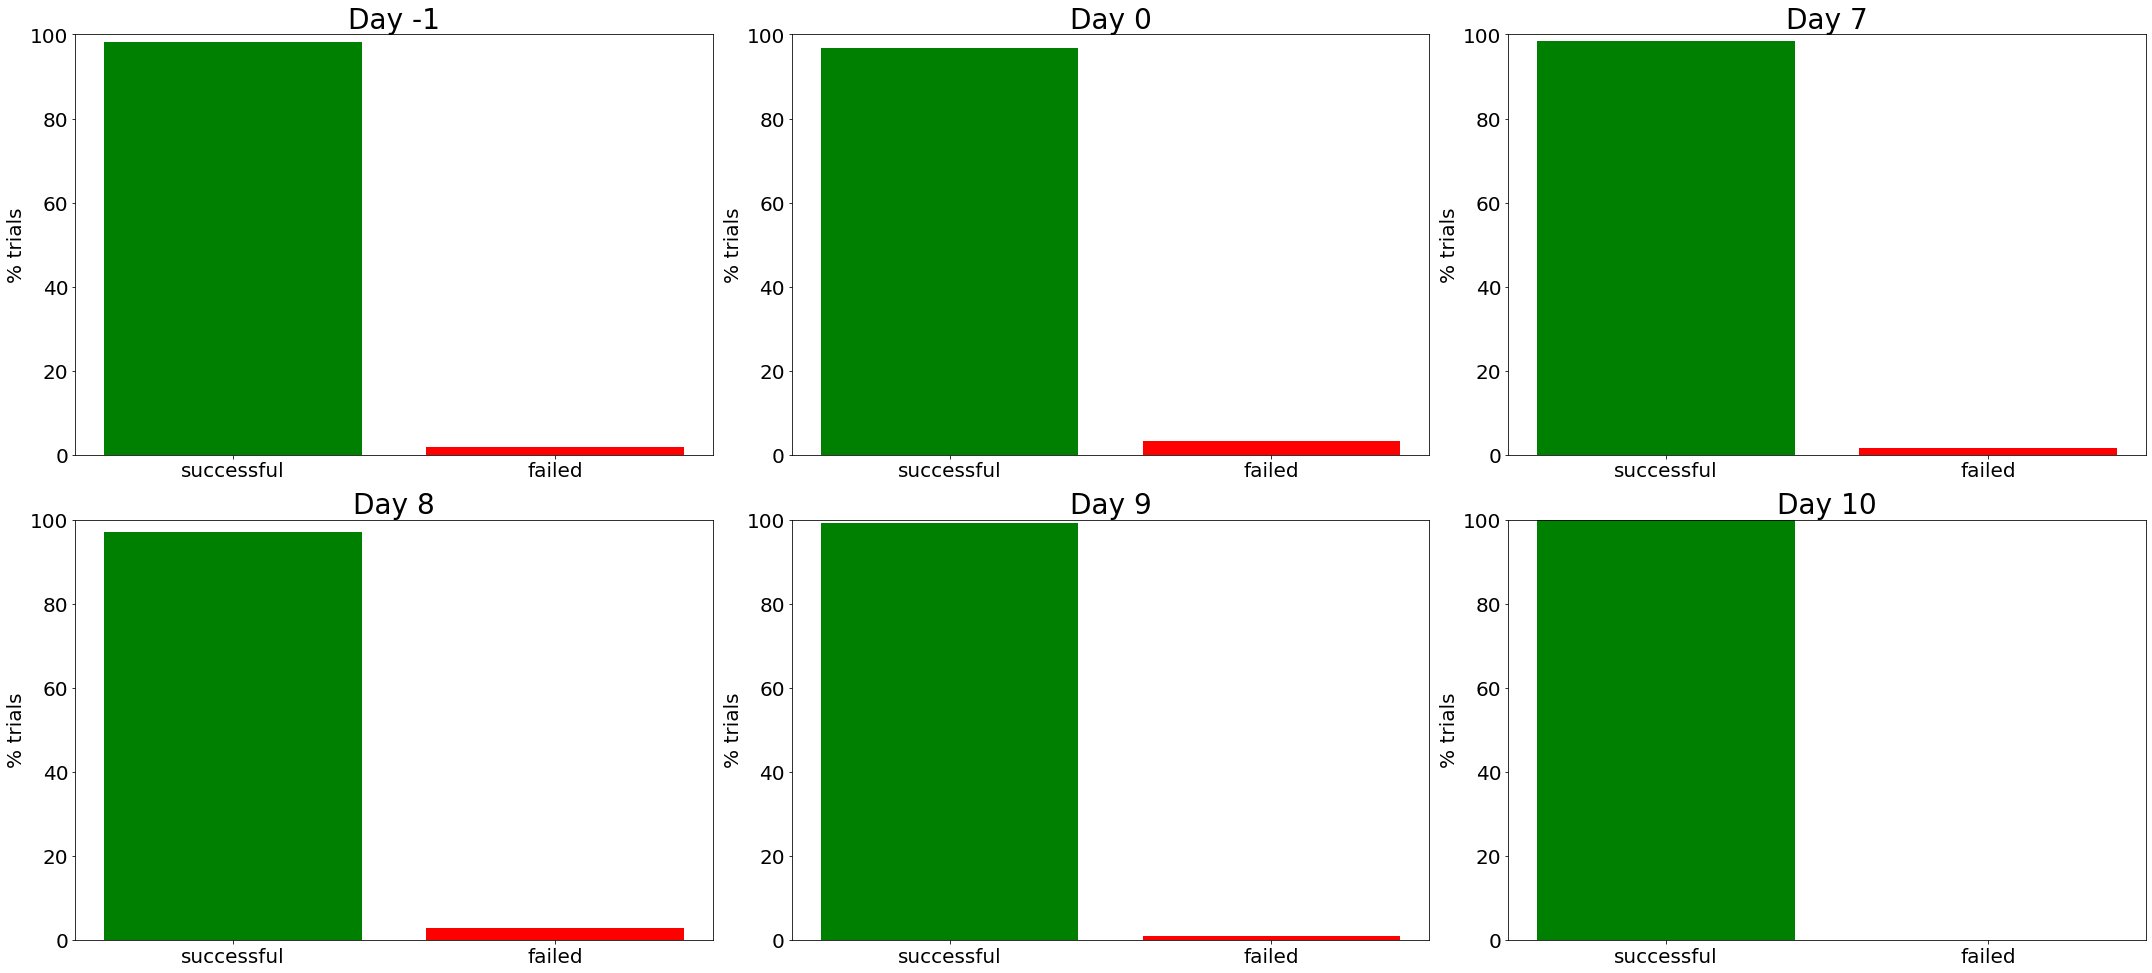

In [3]:
rat_no = 12;    
folder_list = ['Day_-1_fps_250_Nf_375','Day_0_fps_250_Nf_375','Day_7_fps_250_Nf_375','Day_8_fps_250_Nf_375',
               'Day_9_fps_250_Nf_375','Day_10_fps_250_Nf_375']
# rat_no = 36;
# folder_list = ['Day_-2_fps_250_Nf_375', 'Day_-1_fps_250_Nf_375', 'Day_0_pre_fps_250_Nf_375', 'Day_0_post_1_fps_250_Nf_375',
#                 'Day_0_post_2_fps_250_Nf_375', 'Day_0_post_3_fps_250_Nf_375', 'Day_0_post_6h_fps_250_Nf_375',
#                 'Day_1_fps_250_Nf_375', 'Day_2_fps_250_Nf_375', 'Day_3_fps_250_Nf_375', 'Day_4_fps_250_Nf_375', 
#                 'Day_5_fps_250_Nf_375', 'Day_6_fps_250_Nf_375', 'Day_7_fps_250_Nf_375', 
#                 'Day_8_fps_250_Nf_375', 'Day_9_fps_250_Nf_375']
 
exp_par = '6OHDA'
path  = os.path.join(pre_direct, exp_par, 'Rat_' +str(rat_no))


# cfg_sample,files_list_DLC, files_list_LED = find_all_files_same_protocol_non_laser(path, folder)
# where_plot,what_plot = 0,0
# body_part = cfg_sample['body_part_list'][where_plot]
# all_sessions = extract_epochs_over_sessions( files_list_DLC, files_list_LED, folder,body_part,cfg_sample)
# failed = Failed(all_sessions)
# successful = Successful(all_sessions)

run_one_folder_traj(path, rat_no, folder_list, pad_constraint = False, mask_beg_end = True)   
  
plt.savefig(os.path.join(pre_direct, 'Subplots','Rat_'+str(rat_no)+'_mean_trajectory'+
             '.png'),bbox_inches='tight',orientation='landscape',dpi=200)

run_one_folder_stat(path, rat_no, folder_list, pad_constraint = False, mask_beg_end = True)

plt.savefig(os.path.join(pre_direct, 'Subplots','Rat_'+str(rat_no)+'_stats'+
             '.png'),bbox_inches='tight',orientation='landscape',dpi=200)

In [43]:
path  = os.path.join(pre_direct, exp_par, 'Rat_' +str(rat_no))
folder_list = os.listdir(path)
print(folder_list)

['Day_3_fps_250_Nf_375', 'Day_-2_fps_250_Nf_375', 'Day_2_fps_250_Nf_375', 'Day_0_pre_fps_250_Nf_375', 'Day_-1_fps_250_Nf_375', 'Day_0_post_3_fps_250_Nf_375', 'Day_6_fps_250_Nf_375', 'Day_7_fps_250_Nf_375', 'Day_0_post_1_fps_250_Nf_375', 'Day_5_fps_250_Nf_375', 'Day_9_fps_250_Nf_375', 'Day_1_fps_250_Nf_375', 'Day_0_post_2_fps_250_Nf_375', 'Day_0_post_6h_fps_250_Nf_375', 'Day_8_fps_250_Nf_375', 'Day_4_fps_250_Nf_375']


# plot fastest and slowest trials

t_s 10
# jitter in DLC  =  413
t_s 10
# jitter in DLC  =  240
 succeeded =  41 
 failed =  0 
 pad miss detections =  0
 max trial time =  776.0  ms 
 min trial time =  96.0  ms


<Figure size 432x288 with 0 Axes>

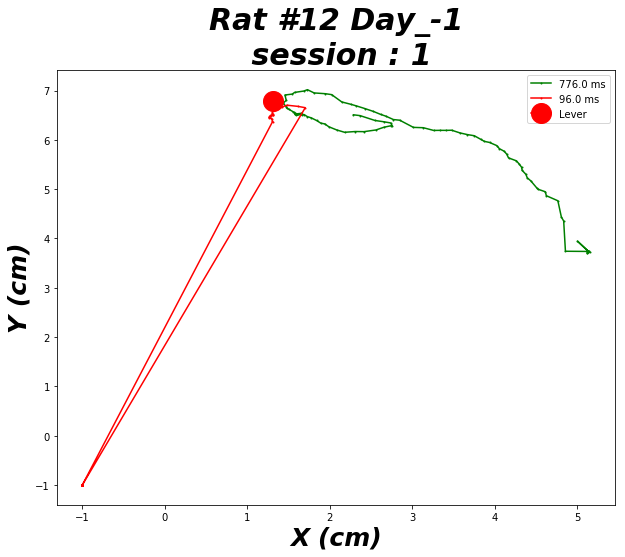

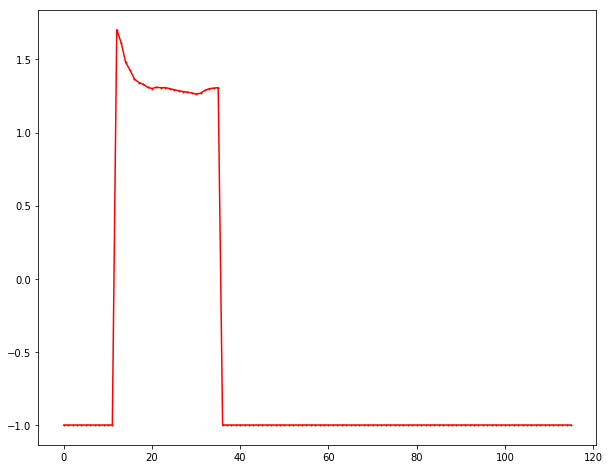

In [11]:
rat_no = 12; spont = "n"; folder = "Day_-1"
folder_list = ['Day_-1','Day_0','Day_7','Day_8','Day_9','Day_10']
direct = pre_direct +'/Rat_' +str(rat_no)+ '/'  # directory to the folder for each mouse

i = 0
files_list_DLC = list_all_files(direct+folder+'/DLC','.csv')
files_list_LED = list_all_files(direct+folder+'/LED','.csv')
path = direct+folder+'/DLC/'+files_list_DLC[i]
df = read_DLC_csv(direct+folder+'/DLC/'+files_list_DLC[i],cfg['fp_trial'])
df_LED = read_LED_csv(direct+folder+'/LED/'+files_list_LED[i],len(df.index))
body_part,what_plot = [0],0

session = extract_opto_epochs(df,df_LED,path,folder,cfg['fp_trial'],body_part,cfg['frame_height'])
session.discard_unacceptable_trials()

failed = Failed(session)
successful = Successful(session)
print(" succeeded = ", successful.n_trials,"\n failed = ", failed.n_trials, "\n pad miss detections = ", session.n_pad_miss_detection)
print(" max trial time = ", successful.max_time/cfg['fps']*1000 ," ms", "\n min trial time = ", successful.min_time/cfg['fps']*1000 ," ms")
plt.figure(1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), sharey=True)

ind, = np.where(successful.epochs_x[j,:] != -1 ) 
plt.plot(successful.epochs_x[successful.trial_no_max_time,ind],successful.epochs_y[successful.trial_no_max_time,ind],c='g', marker='o',markersize=1, label = str(successful.max_time/cfg['fps']*1000)+" ms")

ind, = np.where(successful.epochs_x[j,:] != -1 ) 
plt.plot(successful.epochs_x[successful.trial_no_min_time,ind],successful.epochs_y[successful.trial_no_min_time,ind],c='r', marker='o',markersize=1, label = str(successful.min_time/cfg['fps']*1000)+" ms")
plt.plot([lever_x],[lever_y], marker='o',markersize=20,c = 'r',label = "Lever")
plt.title("Rat #"+str(rat_no)+" "+folder+"\n session : "+str(i+1)).set_fontproperties(font)
plt.ylabel("Y (cm)").set_fontproperties(font_label)
plt.xlabel("X (cm)").set_fontproperties(font_label)
plt.legend(fontsize = 10)
plt.figure(2)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), sharey=True)
plt.plot(successful.epochs_x[successful.trial_no_min_time,ind],c='r', marker='o',markersize=1, label = str(successful.min_time/cfg['fps']*1000)+" ms")



# check session

In [51]:
rat_no = 1
n_session = 0
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


# files_list_DLC, files_list_LED, path, body_part, cfg = set_conf_and_df(pre_direct, folder,rat_no,exp_par )
# df, df_LED = get_DLC_LED_df(files_list_DLC, files_list_LED, n_session,cfg)
# session = extract_opto_epochs(df,df_LED,path,folder,body_part,cfg)
# laser = Laser(session)
# failed = Failed(laser)
# successful = Successful(laser)
# non_laser = Non_Laser(session)

cfg_sample,files_list_DLC, files_list_LED = find_all_files_same_protocol(os.path.join(pre_direct,exp_par), folder)
all_sessions = extract_epochs_over_sessions(files_list_DLC,files_list_LED,folder,body_part, cfg_sample)
write_pickle(os.path.join(pre_direct,'sessions.pickle'), all_sessions)
unpickled = read_pickle(os.path.join(pre_direct,'sessions.pickle'))
print(unpickled.n_trials)

# laser = Laser(all_sessions)
# laser_failed = Failed(laser)
# laser_successful = Successful(laser)
# # non_laser = Non_Laser(all_sessions)
# # normal_failed = Failed(non_laser)
# # normal_successful = Successful(non_laser)


294


# Non Laser 

## Trajectory

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_1/Beta_10_mW_all-RT_Nf_375/Left/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
 succeeded =  25 
 failed =  0 
 pad miss detections =  0


<Figure size 432x288 with 0 Axes>

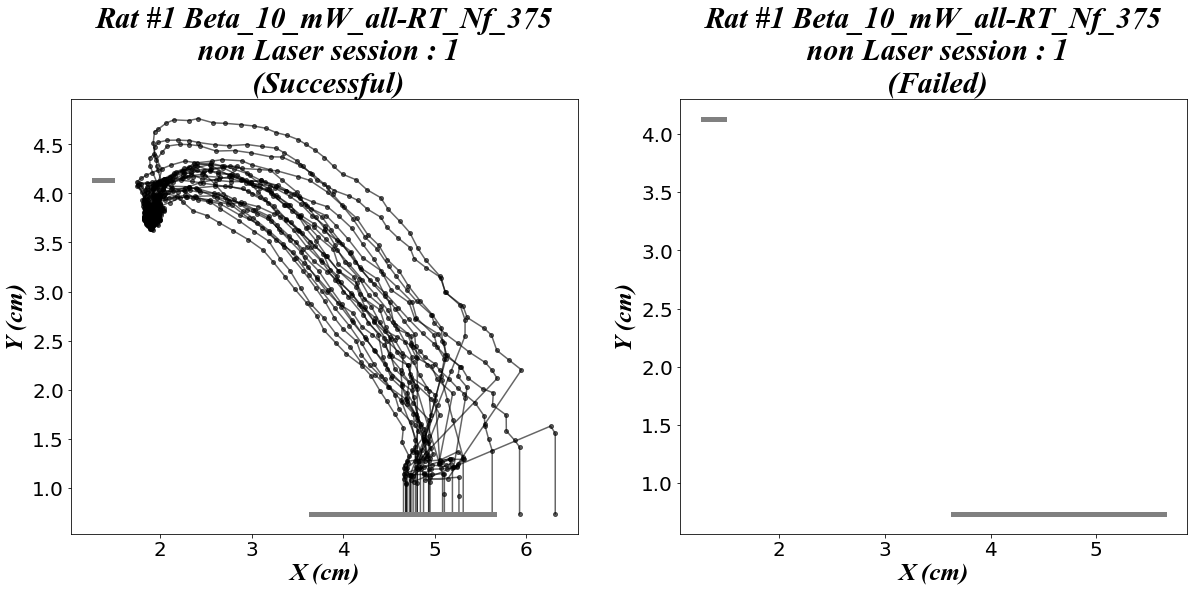

In [2]:
rat_no = 1
m = 3
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
# folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


files_list_DLC, files_list_LED, path, body_part, cfg = set_conf_and_df(pre_direct, folder,rat_no,exp_par )
for n in range(0,1):#len(files_list_DLC)):
    plot_non_laser_trajectory(pre_direct, rat_no, n,files_list_DLC,files_list_LED,path,folder,cfg, font, font_label)


## Velocity

/home/shiva/Desktop/Rat_Lever_Analysis/Laser_ChR2/Rat_102/Square_5_mW_partial-MT_Nf_500/Right/Plots  already exists!
400
to discard - pad misdetection 0
to discard - no solid detection above pad 3
to discard - low likelihoods  0
# second order jitter : 1
discarded:  3
n trials =  29


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

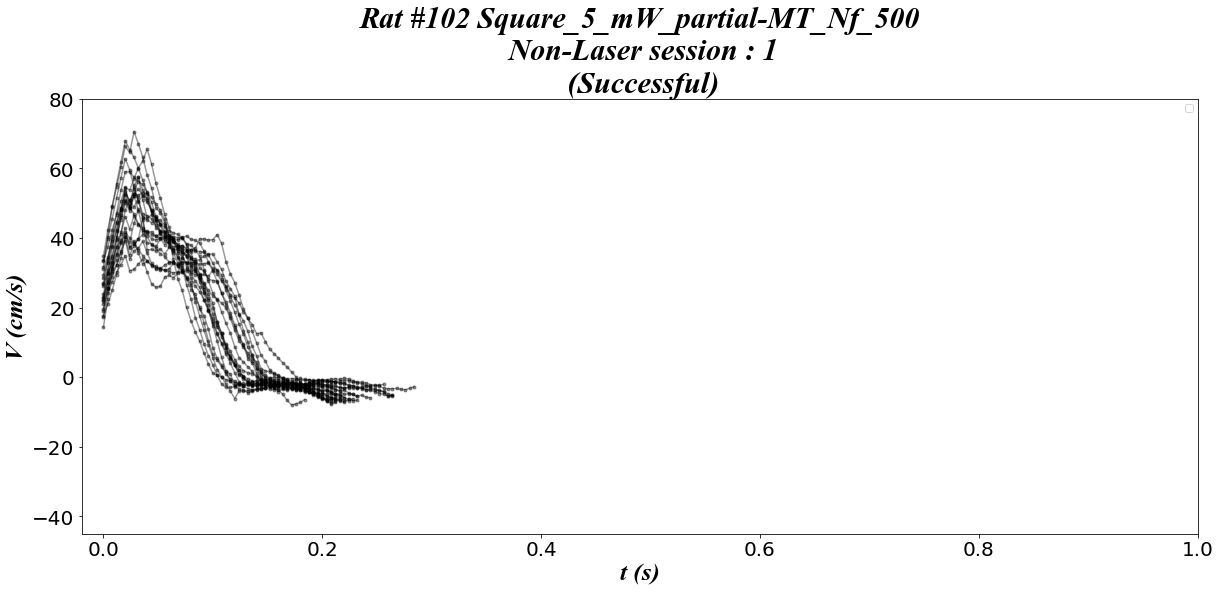

In [3]:
rat_no = 102;
# folder = "Square_2-5_mW_partial-MT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Square_5_mW_all-RT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_20_mW_all-RT_Nf_375" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_15_mW_all-MT_Nf_500" ; exp_par = 'Laser_ArchT' ; frame_height = 400
# folder = "Beta_10_mW_all-RT_Nf_375" ; exp_par = 'Laser_ChR2' ; frame_height = 400
folder = "Square_5_mW_partial-MT_Nf_500" ; exp_par = 'Laser_ChR2' ; frame_height = 300


files_list_DLC, files_list_LED, path, body_part, cfg = set_conf_and_df(pre_direct, folder,rat_no,exp_par )
for n in range(0,len(files_list_DLC)):
    plot_non_laser_velocity(pre_direct, rat_no, n,files_list_DLC,files_list_LED,path,folder,cfg, font, font_label)



# Loop to plot each session alone for all days

/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_36/Day_-2_fps_250_Nf_375/Left/Plots  already exists!
Day_-2_fps_250_Nf_375
to discard - pad misdetection 0
to discard - no solid detection above pad 10
to discard - low likelihoods  0
# second order jitter : 18
discarded:  10
n trials =  33
to discard - pad misdetection 0
to discard - no solid detection above pad 14
to discard - low likelihoods  0
# second order jitter : 9
discarded:  14
n trials =  29
to discard - pad misdetection 0
to discard - no solid detection above pad 13
to discard - low likelihoods  0
# second order jitter : 4
discarded:  13
n trials =  30
to discard - pad misdetection 0
to discard - no solid detection above pad 28
to discard - low likelihoods  0
# second order jitter : 2
discarded:  28
n trials =  15


IndexError: index 0 is out of bounds for axis 0 with size 0

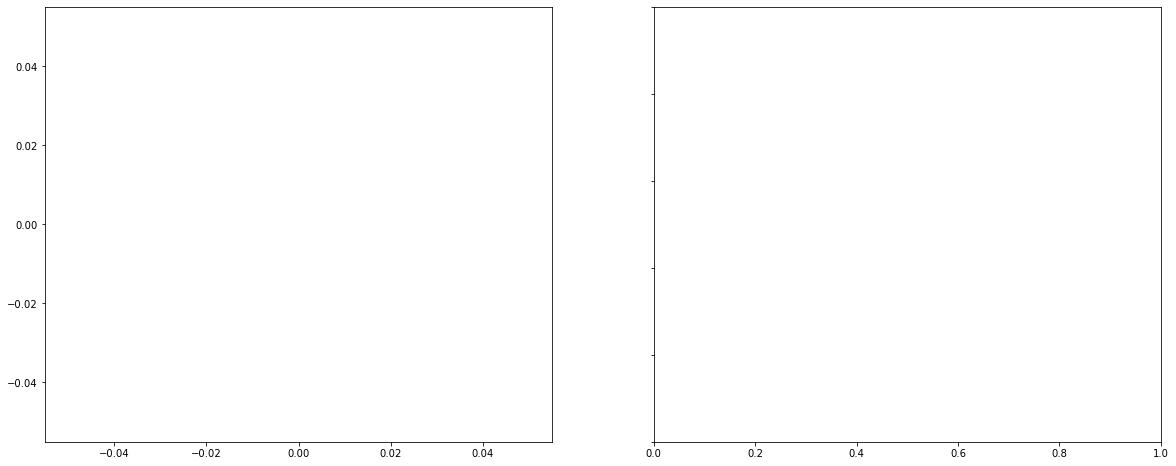

In [4]:
rat_no = 36;
folder_list = ['Day_-2_fps_250_Nf_375', 'Day_-1_fps_250_Nf_375', 'Day_0_pre_fps_250_Nf_375', 'Day_0_post_1_fps_250_Nf_375',
                'Day_0_post_2_fps_250_Nf_375', 'Day_0_post_3_fps_250_Nf_375', 'Day_0_post_6h_fps_250_Nf_375',
                'Day_1_fps_250_Nf_375', 'Day_2_fps_250_Nf_375', 'Day_3_fps_250_Nf_375', 'Day_4_fps_250_Nf_375', 
                'Day_5_fps_250_Nf_375', 'Day_6_fps_250_Nf_375', 'Day_7_fps_250_Nf_375', 
                'Day_8_fps_250_Nf_375', 'Day_9_fps_250_Nf_375']
 
exp_par = '6OHDA'
path  = os.path.join(pre_direct, exp_par, 'Rat_' +str(rat_no))
for folder in folder_list:
    cfg,files_list_DLC, files_list_LED = find_all_files_same_protocol_non_laser(path, folder)
    where_plot,what_plot = 0,0
    print(folder)
    body_part = cfg['body_part_list'][where_plot]
    for n in range(0,1):
        plot_6OHDA_trajectory_separate_colors(pre_direct, rat_no, n,files_list_DLC, files_list_LED,
                                              path,folder,cfg, font, font_label, 
                                              pad_constraint = True, mask_beg_end = True)

/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_-1_fps_250_Nf_375/Left/Plots  already exists!
Day_-1_fps_250_Nf_375
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
to discard - pad misdetection 6
to discard - no solid detection above pad 8
to discard - low likelihoods  0
# second order jitter : 0
discarded:  12
n trials =  31
to discard - pad misdetection 0
to discard - no solid detection above pad 0
to discard - low likelihoods  0
# second order jitter : 0
discarded:  0
n trials =  43
pad not off before reward
pad not off before reward
to discard - pad misdetection 2
to discard - no solid detection above pad 2
to discard - low likelihoods  0
# second order jitter : 0
discarded:  4
n trials =  39
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before reward
pad not off before rew

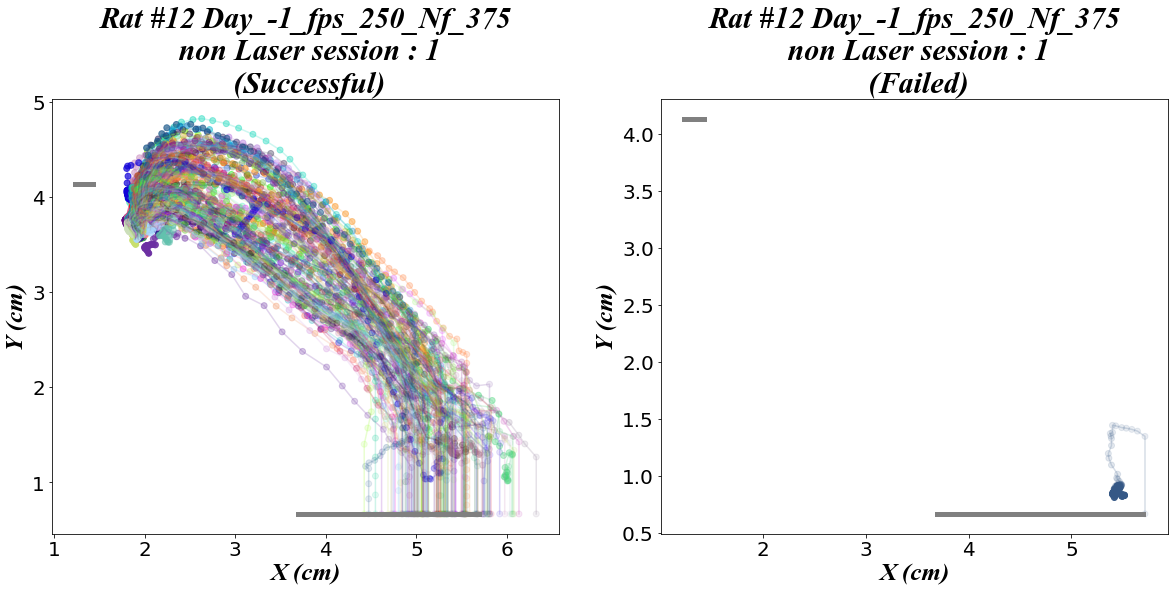

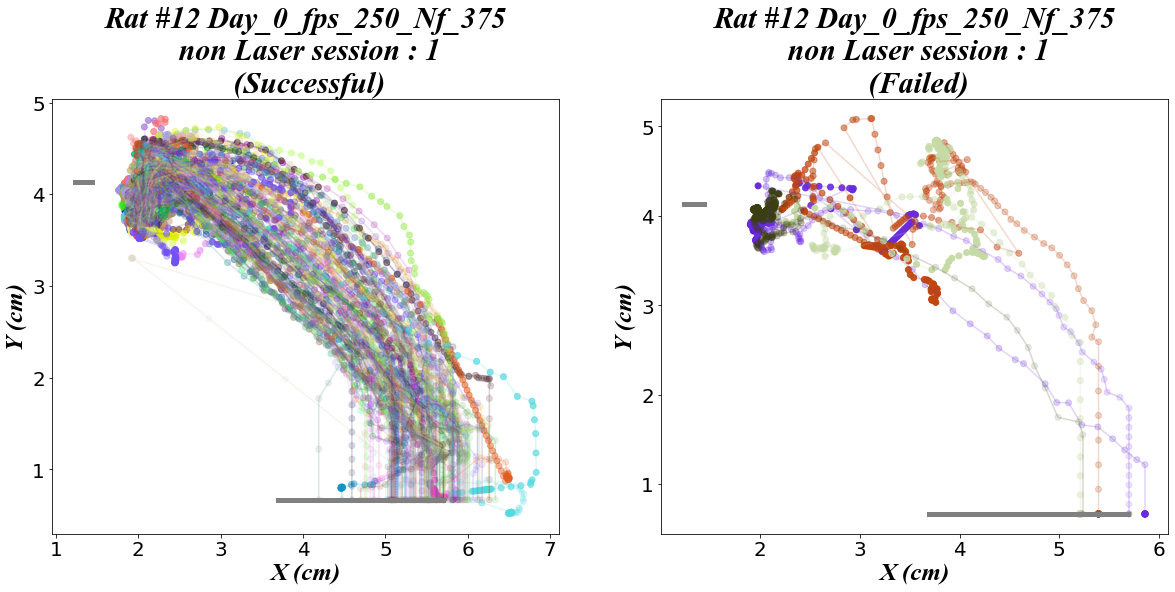

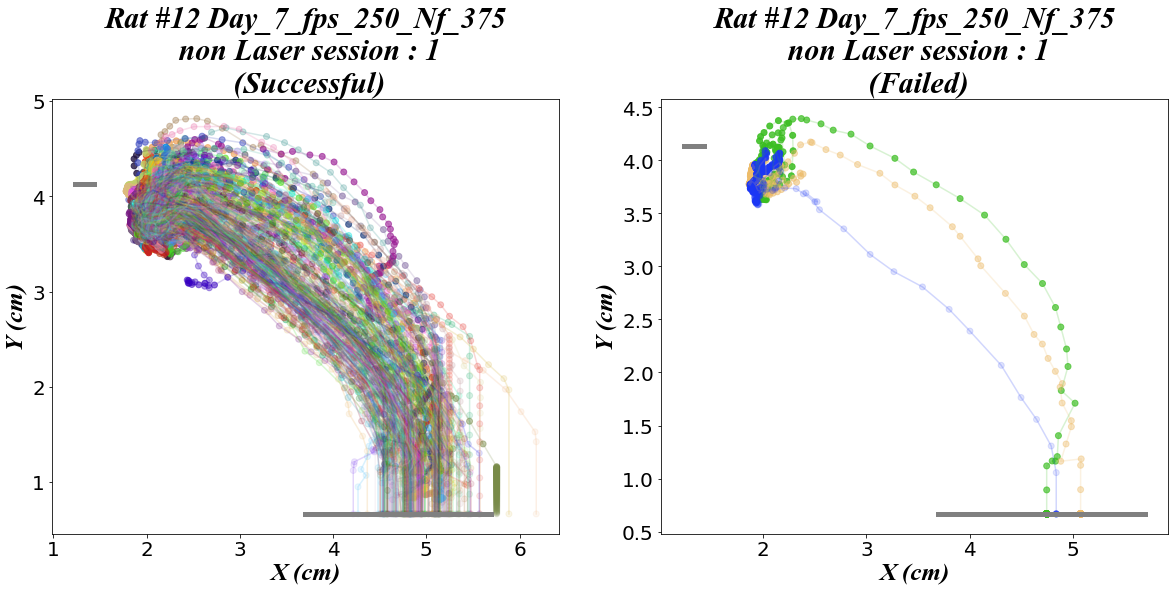

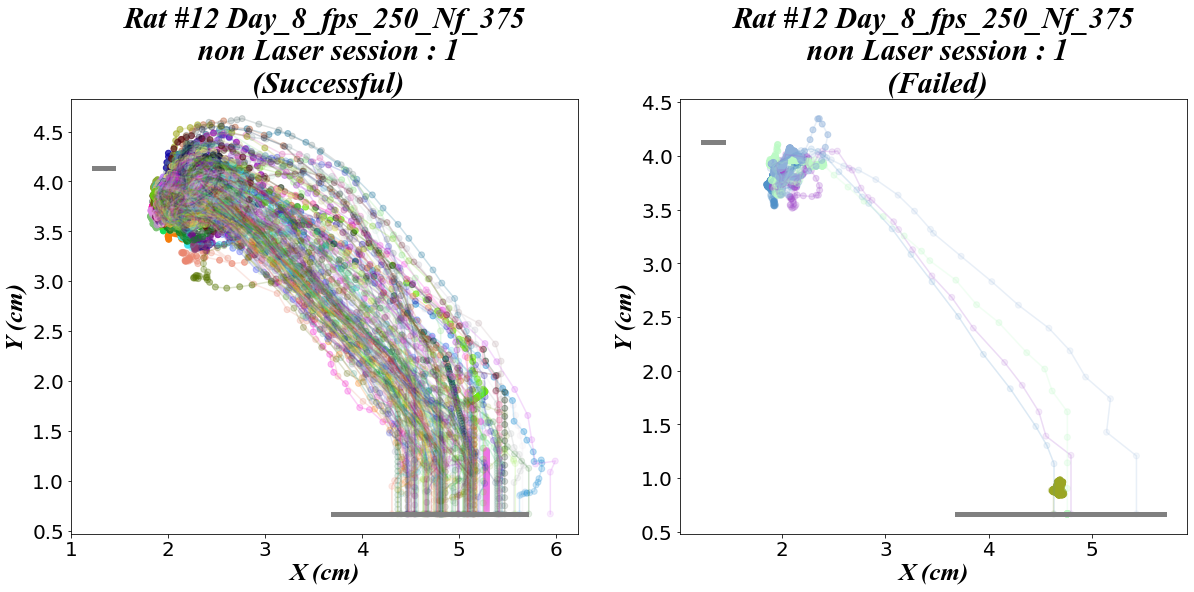

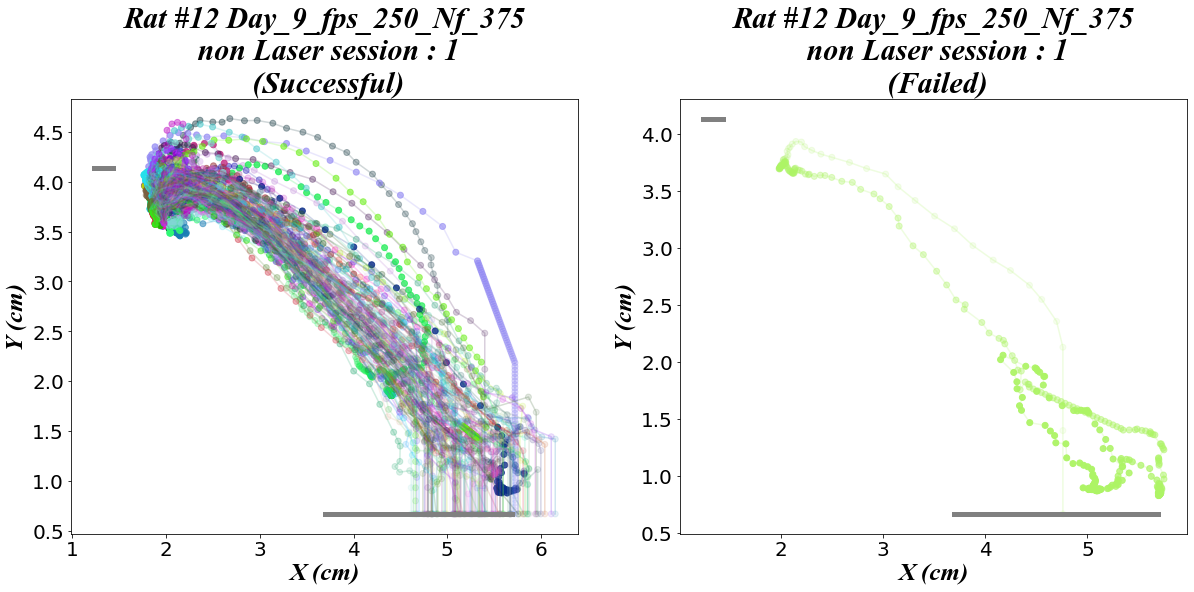

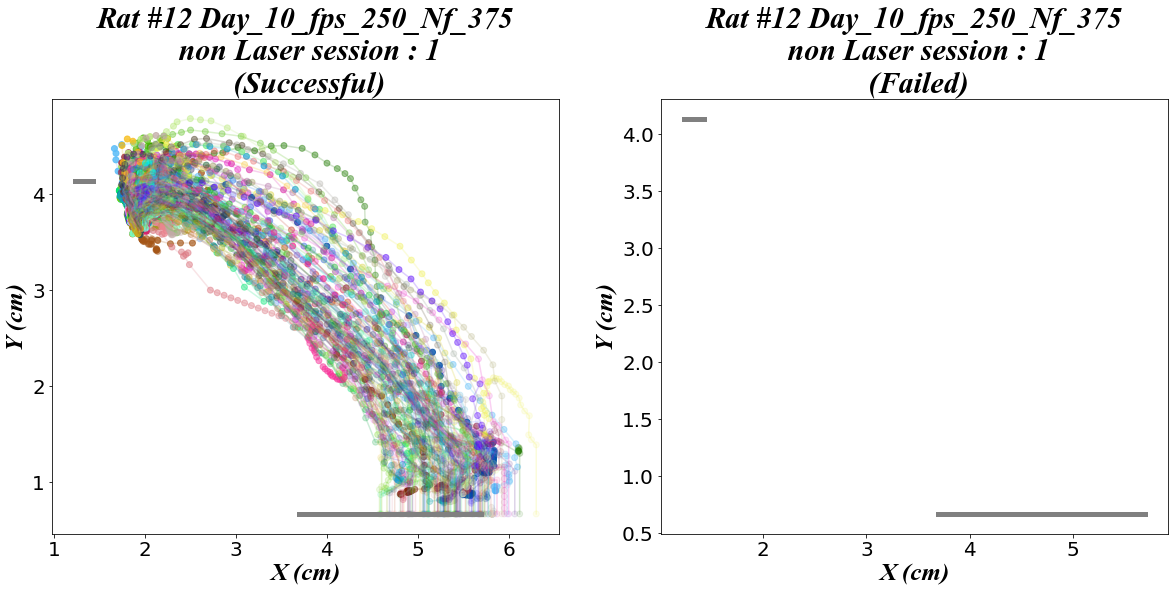

In [5]:
rat_no = 12;    
folder_list = ['Day_-1_fps_250_Nf_375','Day_0_fps_250_Nf_375','Day_7_fps_250_Nf_375','Day_8_fps_250_Nf_375',
               'Day_9_fps_250_Nf_375','Day_10_fps_250_Nf_375']
# rat_no = 36;
# folder_list = ['Day_-2_fps_250_Nf_375', 'Day_-1_fps_250_Nf_375', 'Day_0_pre_fps_250_Nf_375', 'Day_0_post_1_fps_250_Nf_375',
#                 'Day_0_post_2_fps_250_Nf_375', 'Day_0_post_3_fps_250_Nf_375', 'Day_0_post_6h_fps_250_Nf_375',
#                 'Day_1_fps_250_Nf_375', 'Day_2_fps_250_Nf_375', 'Day_3_fps_250_Nf_375', 'Day_4_fps_250_Nf_375', 
#                 'Day_5_fps_250_Nf_375', 'Day_6_fps_250_Nf_375', 'Day_7_fps_250_Nf_375', 
#                 'Day_8_fps_250_Nf_375', 'Day_9_fps_250_Nf_375']
# folder_list = ['Day_0_pre_fps_250_Nf_375']
 
exp_par = '6OHDA'
path  = os.path.join(pre_direct, exp_par, 'Rat_' +str(rat_no))
for folder in folder_list:
    cfg,files_list_DLC, files_list_LED = find_all_files_same_protocol_non_laser(path, folder)
    where_plot,what_plot = 0,0
    print(folder)
    body_part = cfg['body_part_list'][where_plot]
    for n in range(0,1):
        plot_6OHDA_trajectory_separate_colors(pre_direct, rat_no, n,files_list_DLC, files_list_LED,
                                              path,folder,cfg, font, font_label, 
                                              pad_constraint = True, mask_beg_end = True)

## Test

0.2
0.5235987755982988
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0/DLC/Rat 12 head 1 6OHDA x2 04-06-19_20190604_180719_C001H001S0001DLC_resnet50_Rat_lever_Ana_Rat_12May6shuffle1_250000.csv
to discard  1
before [2.62567342 2.5087818 ]
after [2.75063486 2.72251548]
# second order jitter : 1
n trials =  42
[194 115  90 230 220 160  85 106  99 133 184 105 314 125  82 169  83  76
 108 130 100 153 154 113  67  58  54  96  67  99  49  61  61  55  78  64
  50  65  73 107  64]
[ 94  51  23 113  79  46  19   2  23  45 105  42   0  35   0  98   0  23
  41  10  29  41  47  42   0   0   0   1   0   0   0   0   0   0   0   0
   0   0   0   2   0]


/home/shiva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:417: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0/DLC/Rat 12 head 1 6OHDA x2 04-06-19_20190604_182008_C001H001S0001DLC_resnet50_Rat_lever_Ana_Rat_12May6shuffle1_250000.csv
to discard  1
before [1.9323854  1.93818054 1.91674369 1.93157087 1.91553853 1.91578456]
after [5.63831903 5.63831903 5.63831903 5.63831903 5.63831903 5.63831903]
before [2.7091233]
after [3.93897792]
before [2.79551886]
after [3.75852647]
# second order jitter : 3
n trials =  42
[200 148 311 124 154 303  78 149 107 168 106 124  80 222  60  73 144  50
  61  55  83 134  62  96  78  68 108 244  66  77 142 153  86  91  66 109
 117 216 184]
[ 92  38 218   0  46  71   8  60  42  88   1  10   0  80   0   0   2   0
   0   0   1   0   0   0   0   0  52   2   0   1   0   2  27   0   0   1
   4  27  89]
/home/shiva/Desktop/Rat_Lever_Analysis/6OHDA/Rat_12/Day_0/DLC/Rat 12 head 1 6OHDA x2 04-06-19_20190604_182821_C001H001S0001DLC_resnet50_Rat_lever_Ana_Rat_12May6shuffle1_250000.csv
to discard  1
# second order jitter : 0

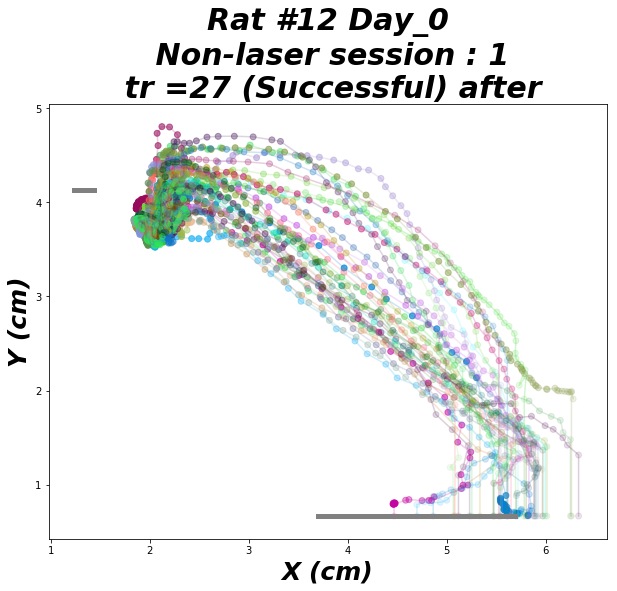

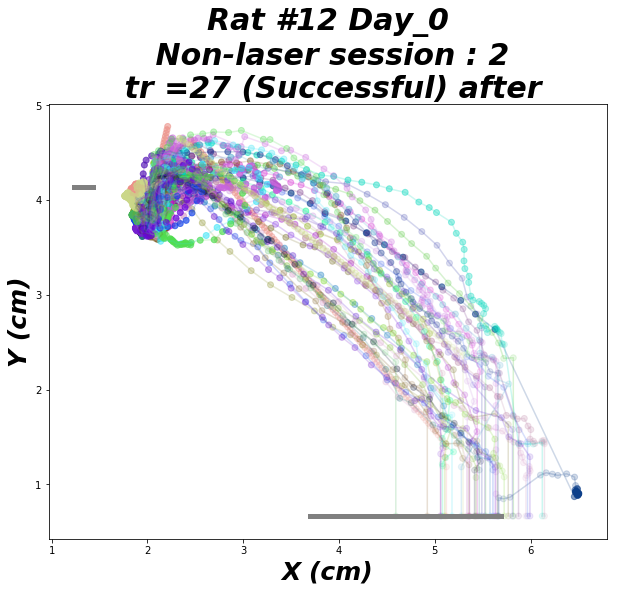

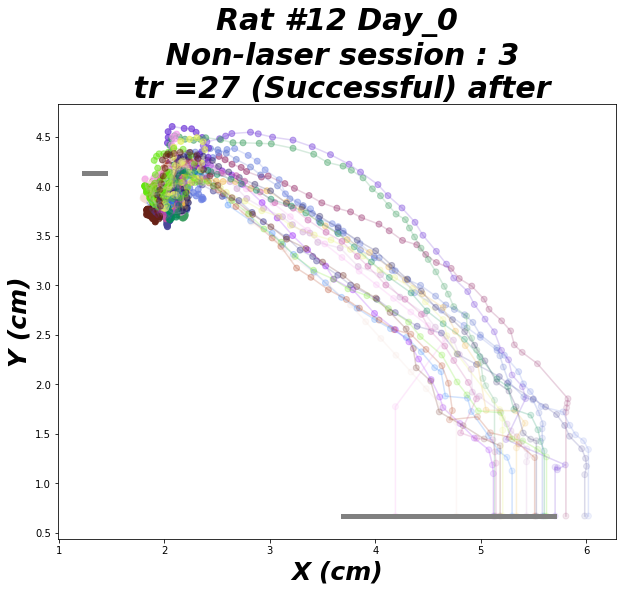

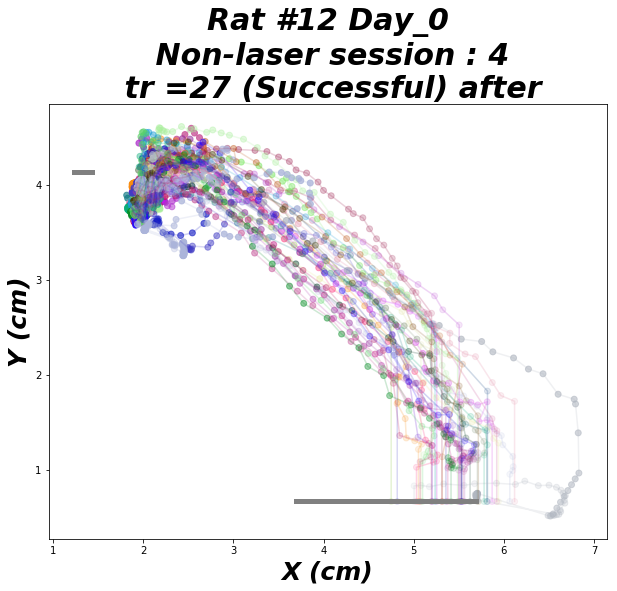

In [9]:

cfg['fp_trial'] = 375 # number of frames per trial
np.random.seed(10)
rat_no = 12
cfg['r_or_l'] = 'L'
# folder_list = ['Day_-1','Day_0','Day_7','Day_8','Day_9','Day_10']
folder_list = ['Day_0']
direct = pre_direct +'/6OHDA'+'/Rat_' +str(rat_no)+ '/'  # directory to the folder for each mouse
extension = ".csv"
cfg['p_cutoff'] = 0.8
cfg['max_speed'] = 50 # cm/s # the max speed of the rat derived from average trajectory 
cfg['max_delta_r_per_frame'] = cfg['max_speed']/cfg['fps']
print(cfg['max_delta_r_per_frame'])
cfg['max_delta_r_per_frame'] =cfg['max_delta_r_per_frame']
cfg['jitter_proximity_thresh_rho'] = 0.7 # the acceptable jitter in r coordinate to be considered as the samr jump
cfg['thresh_adjust'] = 1/5 # if there are 5 jemped points the threshold is <cfg['jitter_proximity_thresh_rho']>
cfg['jitter_proximity_thresh_phi'] = 30/180*np.pi
print(cfg['jitter_proximity_thresh_phi'])
m = 27
for folder in folder_list:
    files_list_DLC = list_all_files(os.path.join( direct, folder, 'DLC' ),'.csv')
    files_list_LED = list_all_files(os.path.join( direct, folder, 'LED' ),'.csv')
    for i in range(len(files_list_DLC)):
#     for i in range(1,2):
        print(files_list_DLC[i])
        df = read_DLC_csv(files_list_DLC[i],cfg['fp_trial'])
        df_LED = read_LED_csv(files_list_LED[i],len(df.index))
        where_plot,what_plot = [0],0
        body_part = cfg['body_part_list'][where_plot]
        path = os.path.join ( direct, folder )
        session = extract_epochs(df,df_LED, cfg['r_or_l'],path,folder,cfg['fp_trial'],body_part,cfg['frame_height'],cfg['n_timebin'],
                                 cfg['velocity_mask'],cfg['p_cutoff'],cfg['pad_thresh'],cfg['max_delta_r_per_frame'],cfg['pad_length_cm'],cfg['t_s'],cfg['max_delta_r_per_frame'])

        failed = Failed(session)
        successful = Successful(session)    

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), sharey=True)
        ax = plt.subplot(111)
        
        for j in range (successful.n_trials-1):
#         for j in range (m,m+1):

            successful.epochs_x[j,successful.likelihood[j] < cfg['p_cutoff']] = -1
            overall_ind, = np.where(successful.epochs_x[j,:] != -1 )
            alphas = np.linspace(0.1, 1, len(overall_ind))
            rgba_colors = np.zeros((len(overall_ind),4))
            rgba_colors[:,:-1] = np.random.random((3))
            rgba_colors[:, 3] = alphas
            plt.scatter(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind], color = rgba_colors )
            plt.plot(successful.epochs_x[j,overall_ind],successful.epochs_y[j,overall_ind],alpha = 0.2, color = rgba_colors[0,:-1] )
        plt.plot([session.lever_x[0] - 0.1, session.lever_x[0] + 0.1],[session.lever_y[0],session.lever_y[0]],lw = 5, c = 'grey')
        plt.plot([session.pad_left_x[0],session.pad_right_x[0]],[session.pad_y[0],session.pad_y[0]],lw = 5, c = 'grey')

        plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-laser session : "+str(i+1)+"\n tr ="+str(m)+" (Successful) after").set_fontproperties(font)
        plt.ylabel("Y (cm)").set_fontproperties(font_label)
        plt.xlabel("X (cm)").set_fontproperties(font_label)
#         plt.legend(fontsize = 10)
#         plt.xlim(1,6)
#         plt.ylim(3.5,7)
#         ax[1] = plt.subplot(122)
#         set_ticks(ax[1])
#         for i in range (0,failed.n_trials):
#             failed.epochs_x[i,failed.likelihood[i] < cfg['p_cutoff']] = -1 # remove frames with small likelihood
#             overall_ind, = np.where(failed.epochs_x[i,:] != -1 )
#             alphas = np.linspace(0.1, 1, len(overall_ind))
#             rgba_colors = np.zeros((len(overall_ind),4))
#             rgba_colors[:,:-1] = np.random.random((3))
#             rgba_colors[:, 3] = alphas
#             plt.scatter(failed.epochs_x[i,overall_ind],failed.epochs_y[i,overall_ind], color = rgba_colors )
#             plt.plot(failed.epochs_x[i,overall_ind],failed.epochs_y[i,overall_ind],alpha = 0.2, color = rgba_colors[0,:-1] )

#         plt.plot([session.lever_x[0] - 0.1, session.lever_x[0] + 0.1],[session.lever_y[0],session.lever_y[0]],lw = 5, c = 'grey')
#         plt.plot([session.pad_left_x[0],session.pad_right_x[0]],[session.pad_y[0],session.pad_y[0]],lw = 5, c = 'grey')

#         plt.title("Rat #"+str(rat_no)+" "+folder+"\n Non-Laser session : "+str(i+1)+'\n (Failed)').set_fontproperties(font)
#         plt.ylabel("Y (cm)").set_fontproperties(font_label)
#         plt.xlabel("X (cm)").set_fontproperties(font_label)
# #         plt.legend(fontsize = 10)
# #         plt.xlim(1,7)
# #         plt.ylim(3.5,7.5)
#         set_ticks(ax[1])
        plt.savefig(pre_direct+'/Subplots/'+'Rat_'+str(rat_no)+'_'+folder+'_successful_session = '+str(i+1)+
                     '.png',bbox_inches='tight',orientation='landscape',dpi=200)

# Mean trajectory 

t_s 10
# jitter in DLC  =  413
t_s 10
# jitter in DLC  =  240
 succeeded =  41 
 failed =  0 
 pad miss detections =  0
 max trial time =  776.0  ms 
 min trial time =  96.0  ms


<ErrorbarContainer object of 3 artists>

<Figure size 432x288 with 0 Axes>

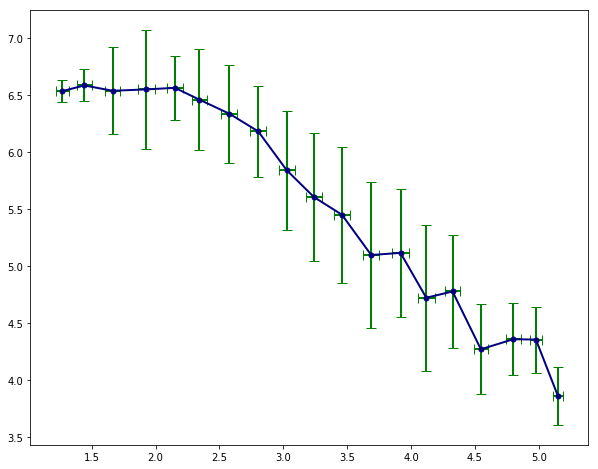

In [39]:
rat_no = 12; spont = "n"; folder = "Day_-1"
folder_list = ['Day_-1','Day_0','Day_7','Day_8','Day_9','Day_10']
direct = os.path.join(pre_direct, 'Rat_' +str(rat_no) )  # directory to the folder for each mouse

i = 0
files_list_DLC = list_all_files(os.path.join(direct, folder, 'DLC') ,'.csv')
files_list_LED = list_all_files(os.path.join(direct, folder, 'LED'),'.csv')
path = os.path.join( (direct, folder, 'DLC', files_list_DLC[i]) 
df = read_DLC_csv(path,cfg['fp_trial'])
df_LED = read_LED_csv(os.path.join(direct, folder, 'LED', files_list_LED[i]) ,len(df.index))
where_plot,what_plot = [0],0
body_part = cfg['body_part_list'][where_plot]
session = extract_opto_epochs(df,df_LED,path,file_name,folder,cfg['fp_trial'],body_part,cfg['frame_height'])

failed = Failed(session)
successful = Successful(session)
print(" succeeded = ", successful.n_trials,"\n failed = ", failed.n_trials, "\n pad miss detections = ", session.n_pad_miss_detection)
print(" max trial time = ", successful.max_time/cfg['fps']*1000 ," ms", "\n min trial time = ", successful.min_time/cfg['fps']*1000 ," ms")

epochs_x = successful.epochs_x
epochs_y = successful.epochs_y
cfg['n_grid'] = 20

trials = find_mean_trajectory(cfg['n_grid'], epochs_x, epochs_y)
                    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), sharey=True)
        
plt.errorbar(trials.x,trials.y,  trials.err_y, trials.err_x,  marker = 'o',
             markersize=5, linewidth=2, capsize=5, capthick=1, color = 'navy', ecolor='g')
# plt.errorbar(trials.x,trials.y, trials.conf_inter_y.T, trials.conf_inter_x.T , marker = 'o',
#              markersize=5, linewidth=2, capsize=5, capthick=1, color = 'navy', ecolor='g')
plt.plot([lever_x],[lever_y], marker='o',markersize=20,c = 'r',label = "Lever")
plt.title("Rat #"+str(rat_no)+" "+folder+"\n session : "+str(i+1)).set_fontproperties(font)
plt.ylabel("Y (cm)").set_fontproperties(font_label)
plt.xlabel("X (cm)").set_fontproperties(font_label)
plt.legend(fontsize = 10)
plt.savefig(os.path.join(pre_direct,'Subplots', 'Rat_'+str(rat_no)+'_'+folder+'_session = '+str(i+1)+
             '.png'),bbox_inches='tight',orientation='landscape',dpi=200)

